In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv(r"C:\Users\bee\Desktop\Data set\medical_cost_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
df.shape

(1338, 7)

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [12]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<Axes: >

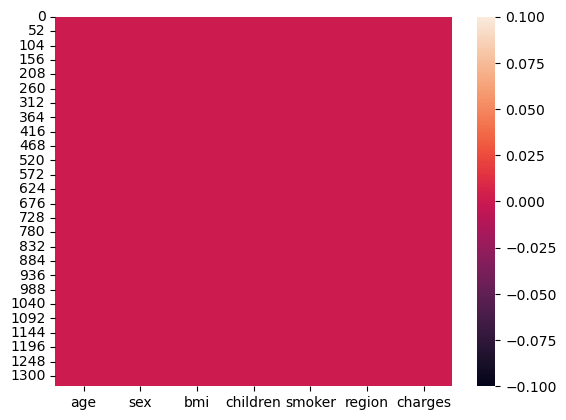

In [18]:
#Visualize data using heatmap.It is clear there is no data missing
sns.heatmap(df.isnull())

In [20]:
#Checking the number of unique values
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [21]:
#Checking the value of count of each column
for i in df.columns:
    print (df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [23]:
#Checking Duplicate value in dataframe
print("Total Duplicate Rows are",df.duplicated().sum())

Total Duplicate Rows are 1


In [25]:
#Removing duplicates
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()



In [44]:
# Performing Labelencoding on categorical features

df.sex=le.fit_transform(df.sex)
df.smoker=le.fit_transform(df.smoker)
df.region=le.fit_transform(df.region)

In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [46]:
#Statistical summary of numerical columns
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [ ]:
#The summary of the data looks perfect because there are no negative/invalid values present
#The counts of all the columns are similar meaning that there are no missing values in the data
#The median(second quartile 50%) is less than the mean in age,bmi,children and charges columns which means the data is skewed to the right in these columns
#There is a big difference in the 75% and max which indicate the presence of outliers in the data

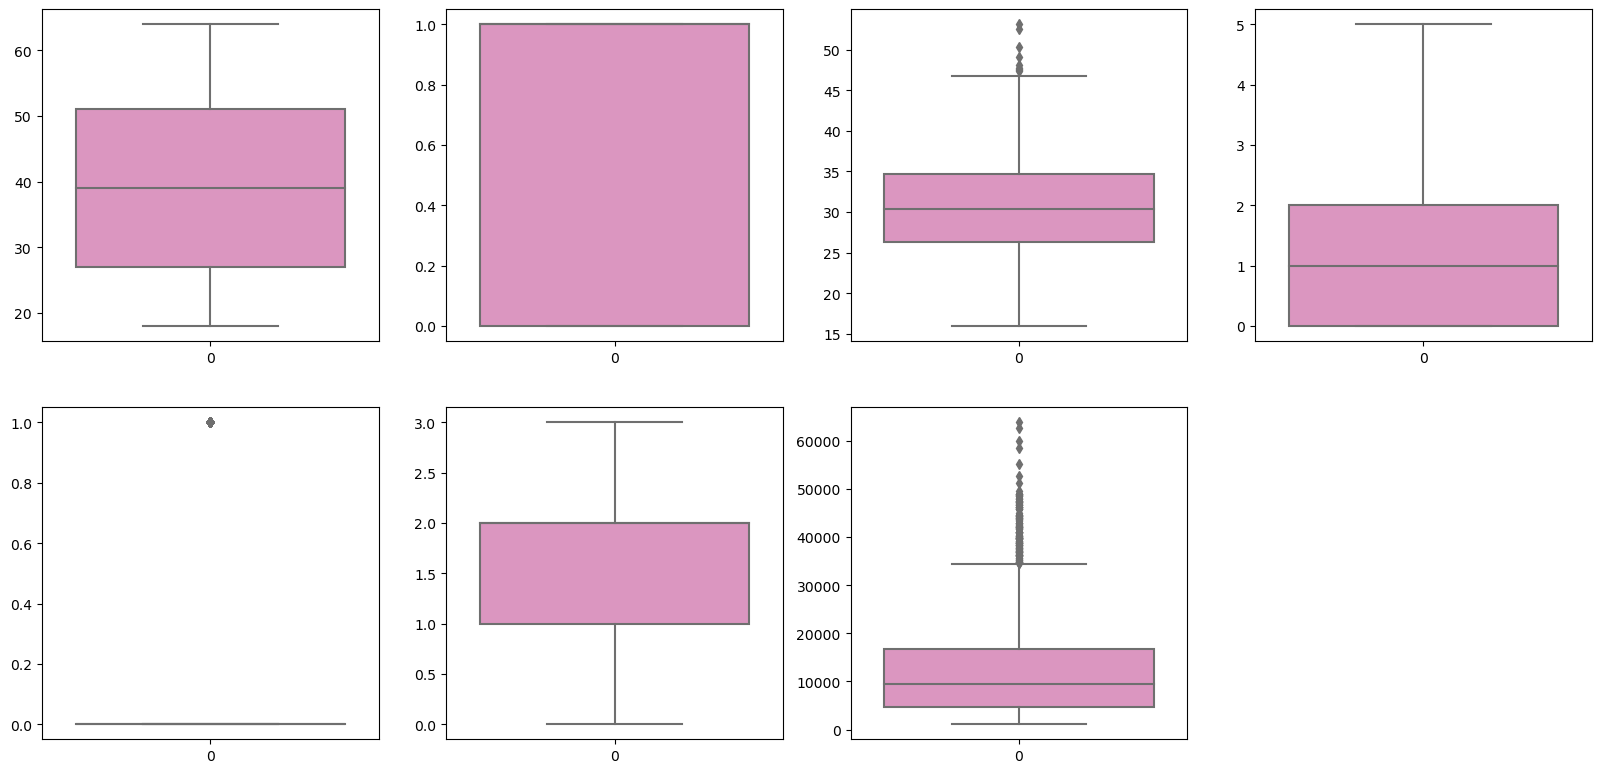

In [74]:
#Let's check outliers using boxplot
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p < 13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette ="Set2_r")
        plt.xlabel
        
    p+=1
    
plt.show()


In [75]:
#Remove outliers using zscore method
from scipy.stats import zscore
out_features=df[['age','sex','bmi','children','smoker','region']]
z=np.abs(zscore(out_features))
z

,age,sex,bmi,children,smoker,region
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.466915
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.372326
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.438495
1336,1.296362,1.010519,0.797813,0.908614,0.507463,1.343905


In [77]:
#threshold
np.where (z>3)

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
         932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
       dtype=int64),
 array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2],
       dtype=int64))

In [81]:
z.iloc[166,3]

3.240618711442044

In [82]:
#removing the data above zscore and creating new dataframe
df1=df[(z<3).all(axis=1)]
df1.shape

(1316, 7)

In [83]:
#shape of old and new dataframe
print("Old Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

Old Data Frame- 1338
New Data Frame- 1316


In [85]:
print("Data Loss Percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage- 1.6442451420029895


In [86]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [95]:
df=df1

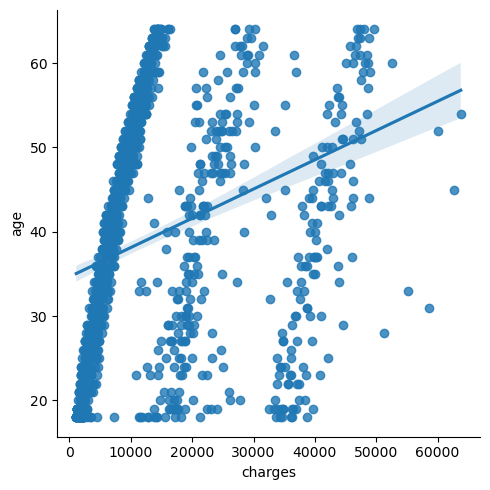

In [98]:
#Visualize using lmplot
sns.lmplot(x='charges',y='age',data=df,palette='colorblind')

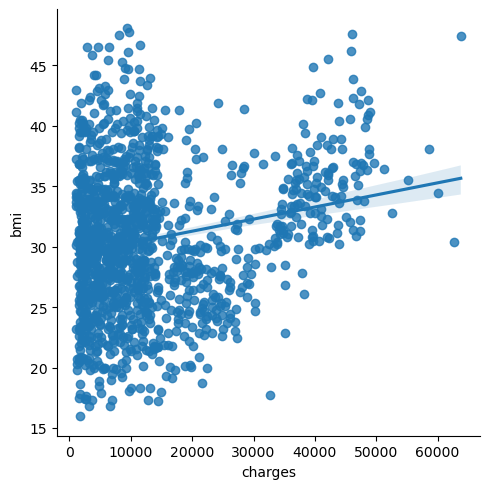

In [99]:
sns.lmplot(x='charges',y='bmi',data=df,palette='colorblind')

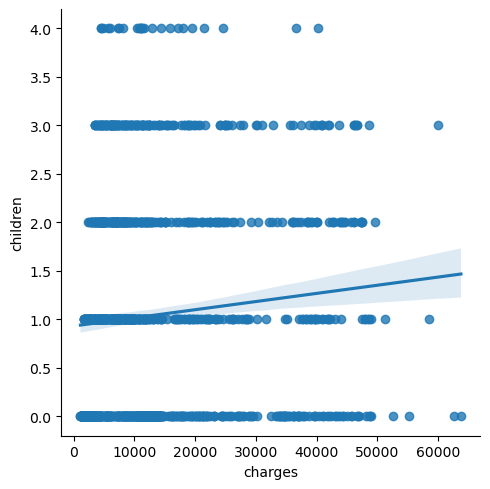

In [100]:
sns.lmplot(x='charges',y='children',data=df,palette='colorblind')

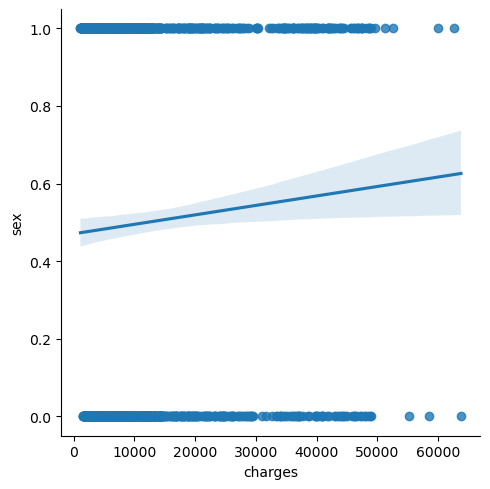

In [101]:
sns.lmplot(x='charges',y='sex',data=df,palette='colorblind')

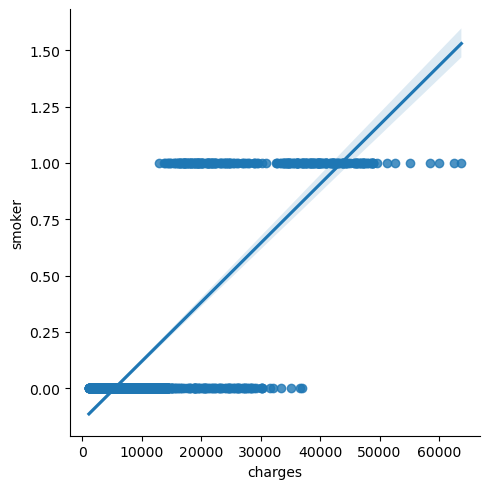

In [102]:
sns.lmplot(x='charges',y='smoker',data=df,palette='colorblind')

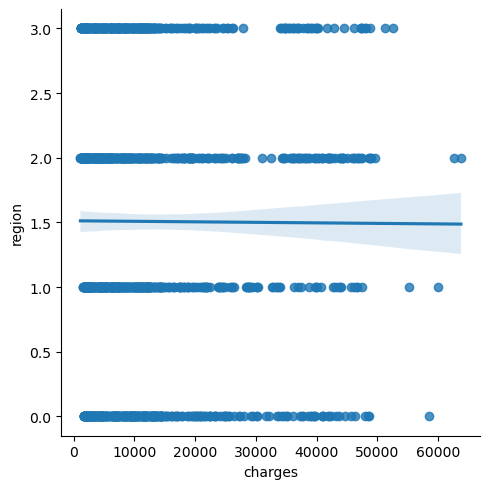

In [103]:
sns.lmplot(x='charges',y='region',data=df,palette='colorblind')

In [104]:
#From the above it is evident that there is a positive relation between age and charges as well as bmi and charges.The rest are not correlated

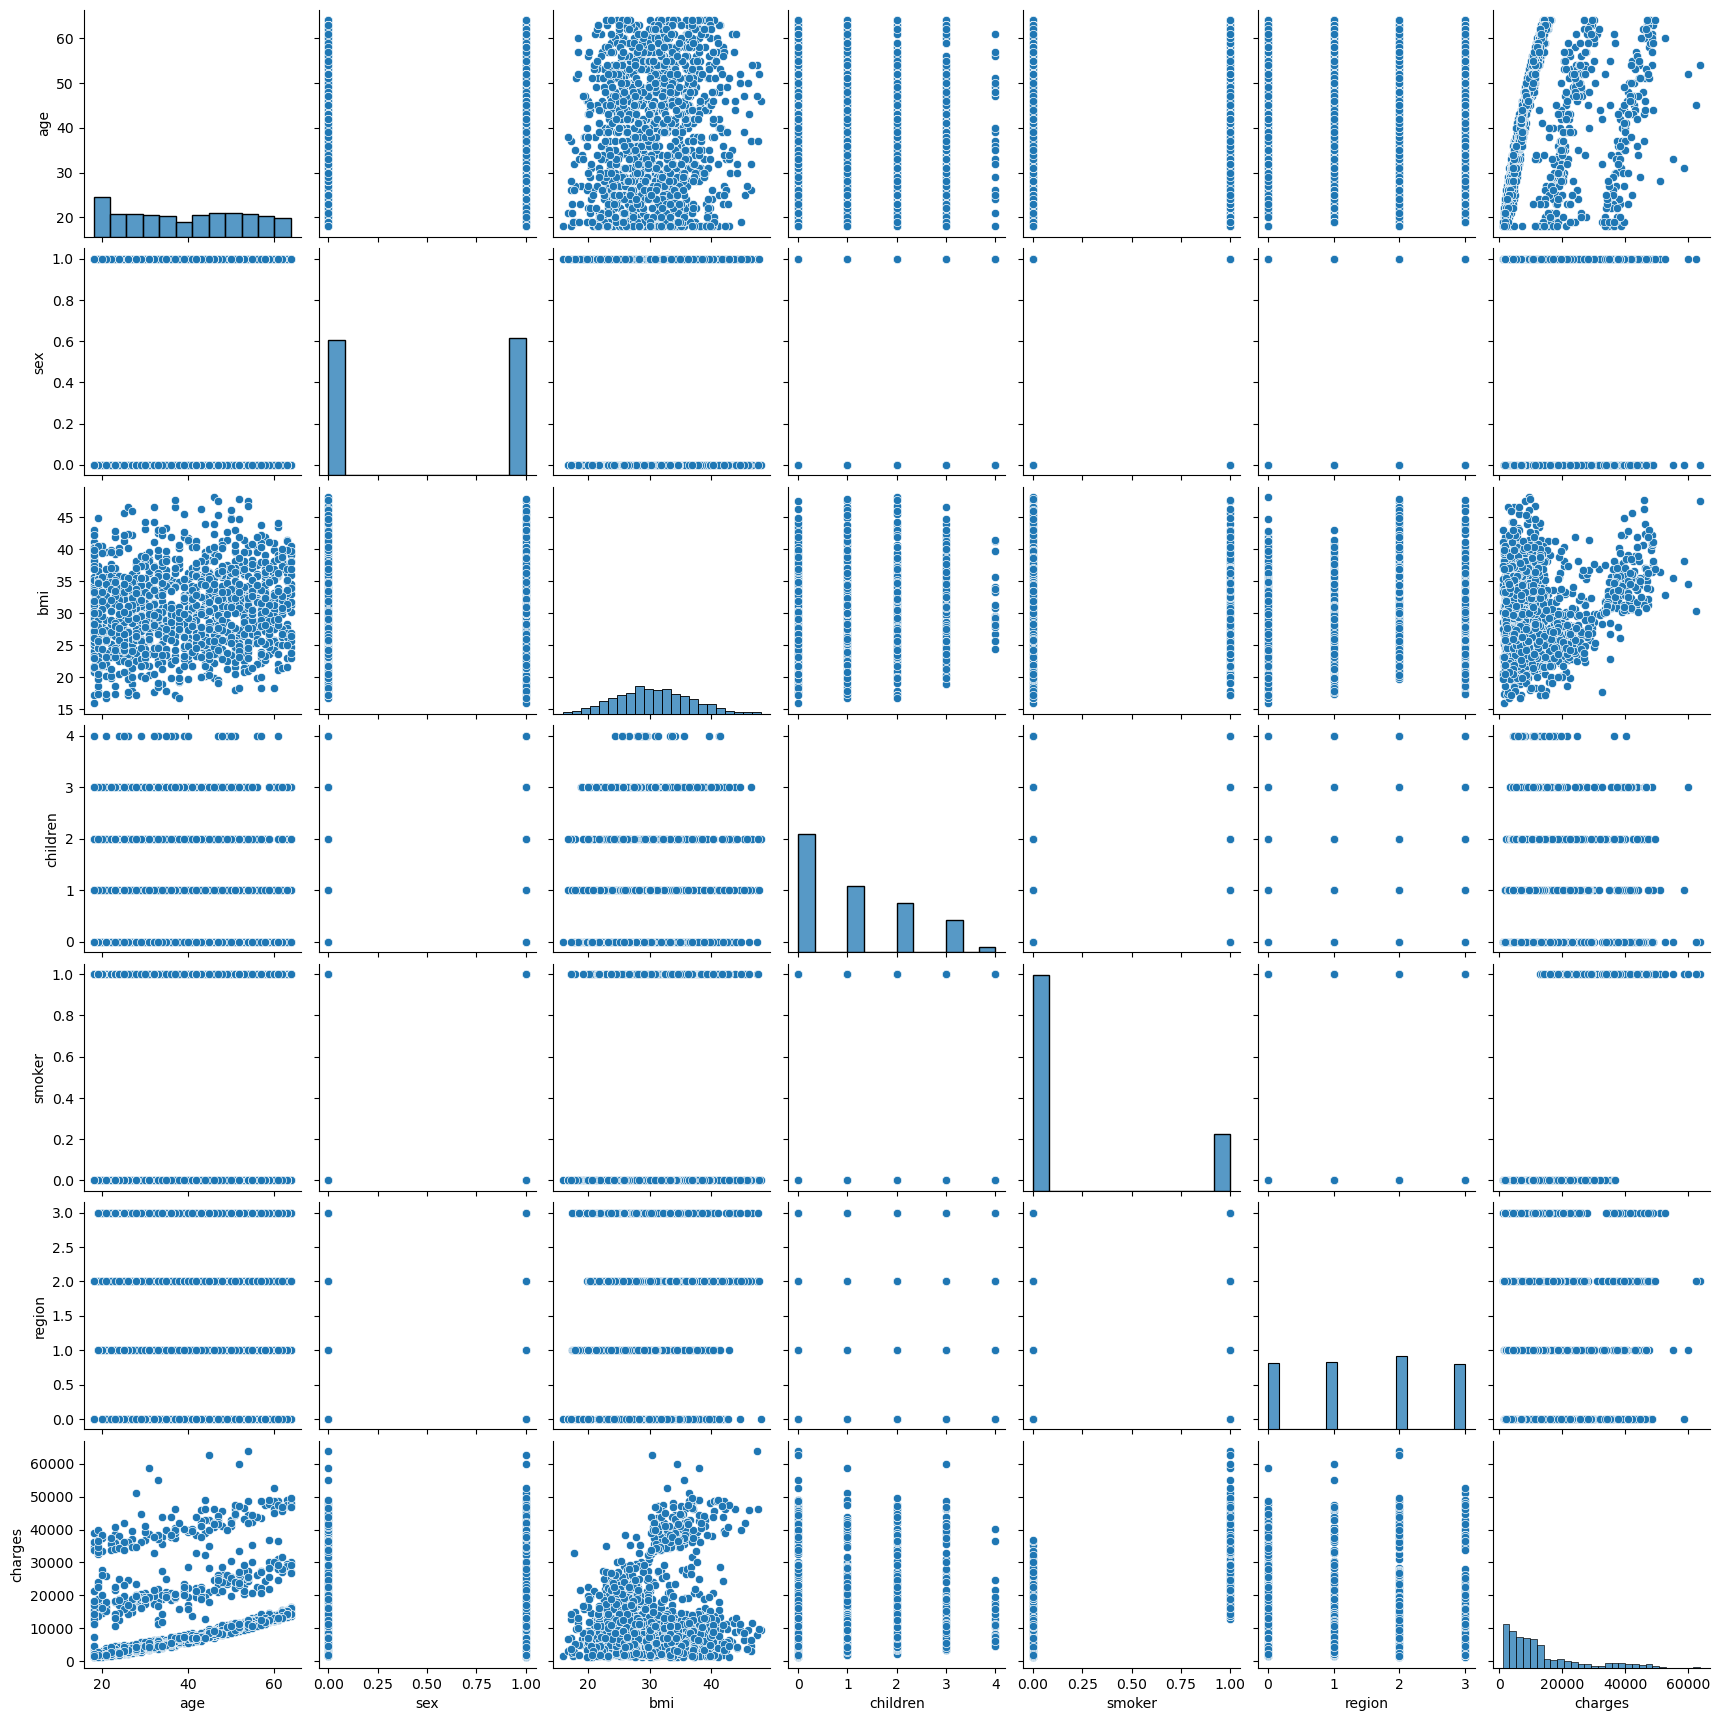

In [105]:
sns.pairplot(data=df,palette = "Dark2")

In [106]:
#pairplot gives the pairwise relatuionship between the features.On the diognal we can view the distribution plots.

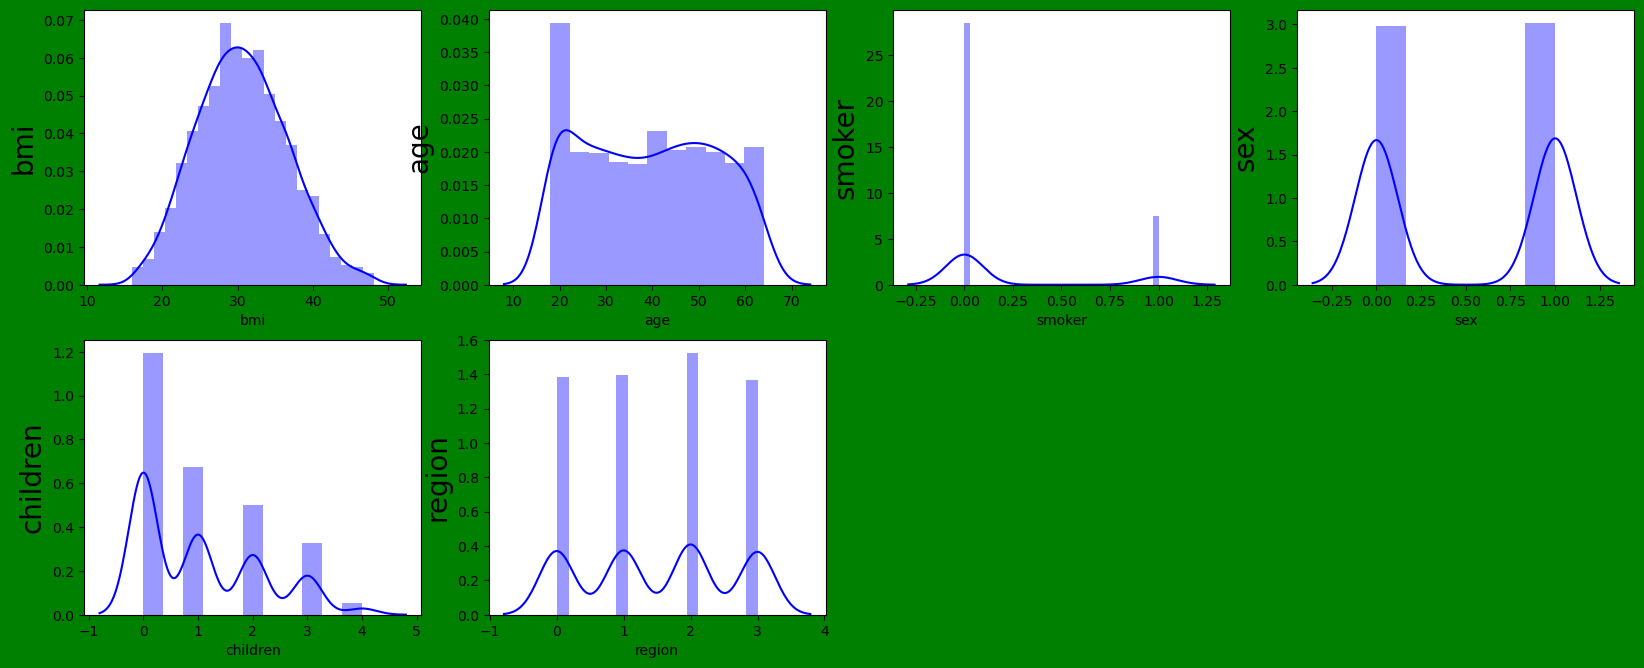

In [118]:
#checking distribution of data
plt.figure(figsize=(20,25), facecolor='green')
plotnumber = 1

for column in distplot:
    if plotnumber<=7:     
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [119]:
#check for skewness
df.skew()

age         0.049904
sex        -0.012172
bmi         0.193564
children    0.740881
smoker      1.450367
region     -0.024107
charges     0.112013
dtype: float64

In [131]:
#Remove skewness using cuberott method
df['smoker']=np.cbrt(df['smoker'])

In [132]:
#check the skewness again
df.skew()

age         0.049904
sex        -0.012172
bmi         0.193564
children    0.740881
smoker      1.450367
region     -0.024107
charges    -0.023694
dtype: float64

<Axes: xlabel='smoker', ylabel='Density'>

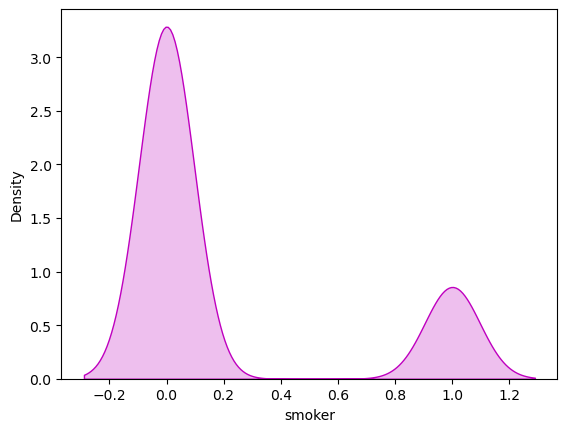

In [133]:
#Visualize how the data has been distributed in smoker after removing skeweness
sns.distplot(df['smoker'],color="m",kde_kws={"shade":True},hist=False)

In [ ]:
#the above shows that the data no looks more normal

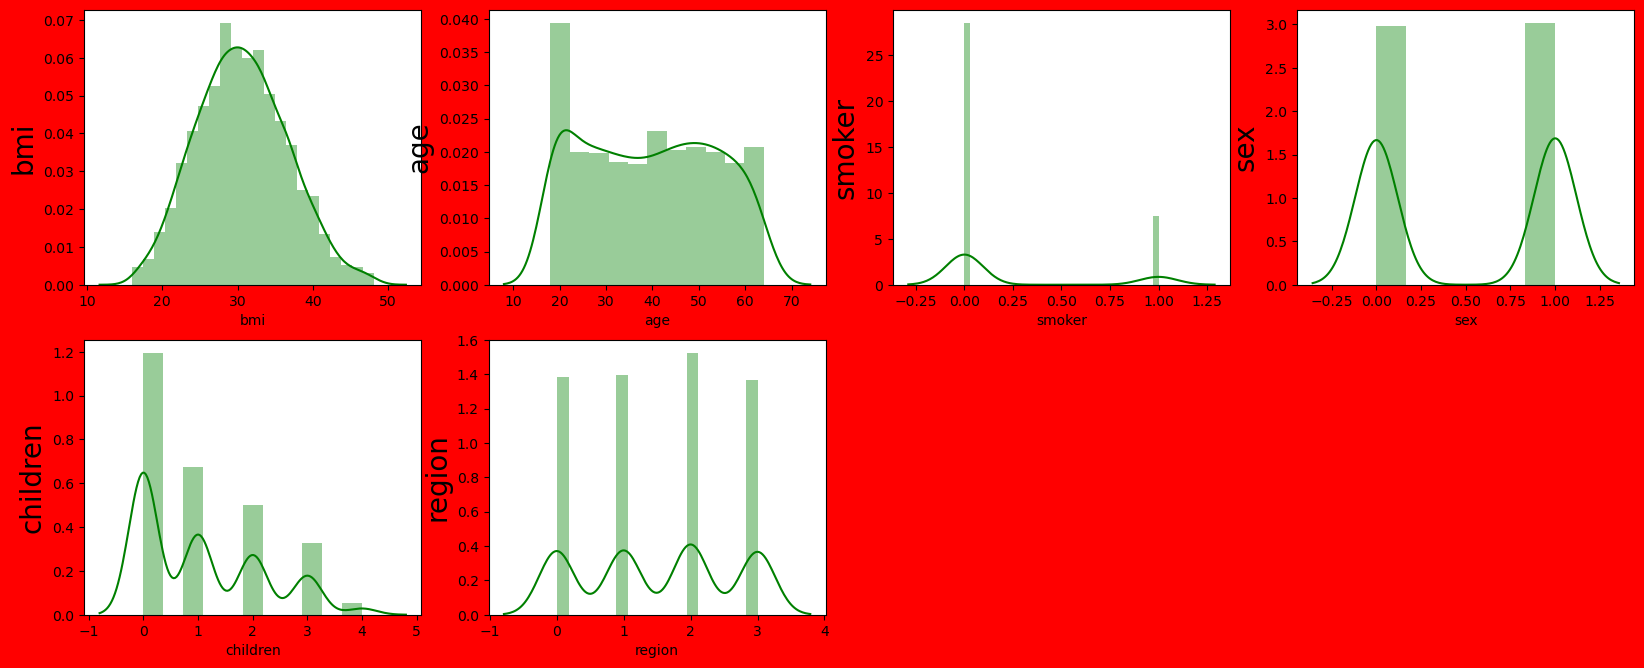

In [135]:
#Lets visualize again
plt.figure(figsize=(20,25), facecolor='red')
plotnumber = 1

for column in distplot:
    if plotnumber<=7:     
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='green')
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [137]:
#Checking the Correlation between features using Corr
cor=df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.017673,0.119062,0.058319,-0.025751,0.004741,0.519862
sex,-0.017673,1.000000,0.039934,0.015315,0.079468,0.006155,0.010980
bmi,0.119062,0.039934,1.000000,0.027706,0.004988,0.159535,0.144662
children,0.058319,0.015315,0.027706,1.000000,0.025409,-0.004830,0.175084
smoker,-0.025751,0.079468,0.004988,0.025409,1.000000,-0.001462,0.674563
region,0.004741,0.006155,0.159535,-0.004830,-0.001462,1.000000,-0.040764
charges,0.519862,0.010980,0.144662,0.175084,0.674563,-0.040764,1.000000


<Axes: >

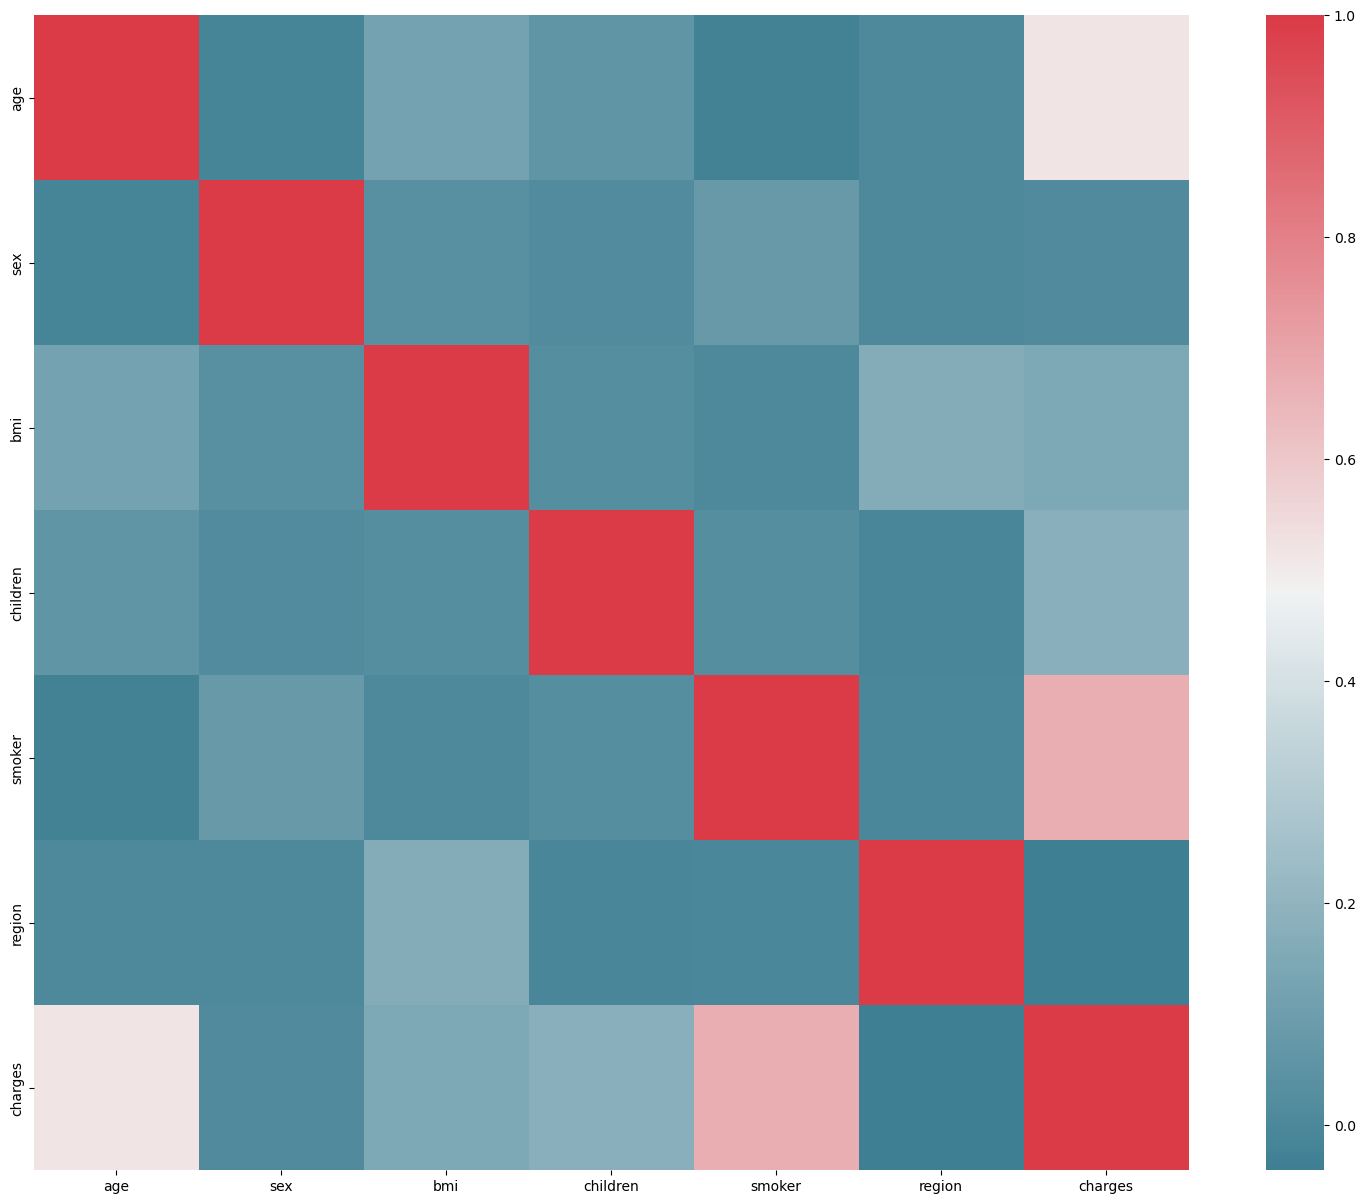

In [138]:
#Visualizing the correlation matrix byplotting heatmap.
f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [145]:
#seperate the target and independent variables into x and y
x=df.drop("charges",axis=1)
y=df["charges"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (1316, 6)
Label Dimension= (1316,)


In [146]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.441444,-1.006098,-0.453768,-0.928234,1.959141,1.352089
1,-1.512509,0.993939,0.527239,-0.038536,-0.510428,0.446568
2,-0.801858,0.993939,0.398555,1.740862,-0.510428,0.446568
3,-0.446533,0.993939,-1.321967,-0.928234,-0.510428,-0.458954
4,-0.517598,0.993939,-0.289988,-0.928234,-0.510428,-0.458954
...,...,...,...,...,...,...
1311,0.761574,0.993939,0.059297,1.740862,-0.510428,-0.458954
1312,-1.512509,-1.006098,0.218063,-0.928234,-0.510428,-1.364475
1313,-1.512509,-1.006098,1.041975,-0.928234,-0.510428,0.446568
1314,-1.299314,-1.006098,-0.804724,-0.928234,-0.510428,1.352089


In [148]:
#Checking Variance inflation factor in each scaled column that is x.shape[1](1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.018969,age
1,1.008550,sex
2,1.043397,bmi
3,1.004829,children
4,1.007649,smoker
5,1.026415,region


In [ ]:
#Based on the VIF values no data will be dropped because VIF values are below the threshold of 10

In [150]:
#Modelling
#import the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [155]:
#Creating train test split
#Finding the best random state

maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at random_state",maxRS)

Maximum r2 score is  0.8231919675665694 at random_state 11


In [157]:
#Import Regression algorithms

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor

In [163]:
#checking accuracy of Linear Regression

LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.7491690378464266
R2_score on training data: 77.78742872899261
Mean Absolute Error:- 0.014353883572426264
Mean Squared Error:- 0.0005506472885364051
Root Mean Squared Error:- 0.023465874979135236


In [164]:
#checking accuracy of RandomForestRegressor

RFR=LinearRegression()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.7491690378464266
R2_score on training data: 77.78742872899261
Mean Absolute Error:- 0.014353883572426264
Mean Squared Error:- 0.0005506472885364051
Root Mean Squared Error:- 0.023465874979135236


In [171]:
#checking accuracy of KNN Model

knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.7918562208008367
R2_score on training data: 86.32979192431087
Mean Absolute Error:- 0.012652000404407683
Mean Squared Error:- 0.00045693644300405864
Root Mean Squared Error:- 0.021376071739308385


In [167]:
#checking accuracy of the Gradient Boosting Regressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.8131818864377367
R2_score on training data: 89.51317649477043
Mean Absolute Error:- 0.010692969625046714
Mean Squared Error:- 0.0004101203726977013
Root Mean Squared Error:- 0.02025142890508473


In [168]:
#checking accuracy of the Lasso Regressor

lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: -9.047369502468428e-05
R2_score on training data: 0.0
Mean Absolute Error:- 0.03777982568743181
Mean Squared Error:- 0.002195490950969942
Root Mean Squared Error:- 0.04685606631984745


In [169]:
#checking accuracy of the Ridge Regressor

rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_rd))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.7491957899023469
R2_score on training data: 77.78733923932019
Mean Absolute Error:- 0.014361035618220911
Mean Squared Error:- 0.0005505885599531043
Root Mean Squared Error:- 0.023464623584304612


In [170]:
#checking accuracy of the Decision Tree Regressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score: 0.6243277895364236
R2_score on training data: 100.0
Mean Absolute Error:- 0.014015473802699019
Mean Squared Error:- 0.0008247103240133188
Root Mean Squared Error:- 0.028717770178294116


In [177]:
#Cross validation Score
from sklearn.model_selection import cross_val_score

In [178]:
#Checking CV score for Linear Regressor
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,predLR)-score.mean())

[0.79929317 0.69058525 0.83367652 0.76682144 0.74094007]
0.7662632932151008
Difference between R2 score and cross validation score is - -0.01709425536867415


In [180]:
#Checking CV score for Random Forest Regressor
score=cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_RFR)-score.mean())

[0.79929317 0.69058525 0.83367652 0.76682144 0.74094007]
0.7662632932151008
Difference between R2 score and cross validation score is - -0.01709425536867415


In [183]:
#Checking CV score for KNN model
score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_knn)-score.mean())

[0.84766552 0.69852391 0.84608355 0.81086062 0.79209736]
0.7990461908075808
Difference between R2 score and cross validation score is - -0.00718997000674404


In [184]:
#Checking CV score for Gradient Boosting Regressor model
score=cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_GBR)-score.mean())

[0.87347853 0.73264313 0.90172532 0.83734376 0.8032068 ]
0.8296795076703745
Difference between R2 score and cross validation score is - -0.01649762123263776


In [185]:
#Checking CV score for Lasso Regressor model
score=cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_lasso)-score.mean())

[-3.80656411e-05 -7.42363087e-06 -2.10057149e-03 -4.18487807e-05
 -1.25350597e-03]
-0.0006882831037597015
Difference between R2 score and cross validation score is - 0.0005978094087350172


In [186]:
#Checking CV score for Ridge Regressor model
score=cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_rd)-score.mean())

[0.79925058 0.69070961 0.83353306 0.76686422 0.74097442]
0.7662663792181632
Difference between R2 score and cross validation score is - -0.017070589315816287


In [187]:
#Checking CV score for Decision tree regressor model
score=cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_dtr)-score.mean())

[0.73543479 0.56357535 0.66901068 0.67695049 0.53808565]
0.6366113909284654
Difference between R2 score and cross validation score is - -0.012283601392041765


In [ ]:
#KNN model is the best model with the least difference between r2 score and cross validation